In [1]:
import os
import sys
from time import time
import numpy as np
import h5py 
import seaborn as sns
import scipy.interpolate as interpolate
import gmpy2 as gmp
import matplotlib.pyplot as plt

from importlib import reload

sys.path.append('/Users/theoares/lqcd/utilities')
import plottools as pt
from formattools import *
pt.set_font()
default_style = styles['notebook']

import numpy as np

sys.path.append('/Users/theoares/lqcd/spectral/recon_tools')
import jax_spline

sys.path.append('/Users/theoares/inverse_problems/inverse_problems')
from inverse_problems import nevanlinna as nv

In [2]:
default_style = styles['talk']

## R-ratio parameterization

In [3]:
def get_f(C, M, Gamma):
    def f(sqrts):
        return (C * Gamma**2) / (4*(sqrts - M)**2 + Gamma**2)
    return f
# def theta(x):
#     if x > 0:
#         return 1.0
#     return 0.0
def theta(xx):
    out = np.zeros(xx.shape)
    out[xx > 0] = 1.0
    return out

In [4]:
mpi = 0.13957039                                      # GeV
C = np.array([655.5, 8.5, 11.5, 50.0])                # unitless
M = np.array([0.7819, 0.7650, 0.7820, 1.0195])        # GeV
Gamma = np.array([0.0358, 0.130, 0.00829, 0.00426])   # GeV
[f0, f1, f2, f3] = [get_f(C[ii], M[ii], Gamma[ii]) for ii in range(4)]
Q_sq = ((2/3)**2 + (1/3)**2 + (1/3)**2)

In [5]:
def R(s):
    sqrts = np.sqrt(s)
    return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
            + theta(sqrts - 4.4*mpi)*theta(M[3] - sqrts)*(f1(sqrts) + f2(sqrts)) \
            + f3(sqrts) + 3*Q_sq*theta(sqrts - M[3])
def rho(s):
    return R(s) / (12*np.pi**2)

/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/1288282315.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/1288282315.py:3: RuntimeWarning: invalid value encountered in power
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/1288282315.py:3: RuntimeWarning: invalid value encountered in multiply
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \


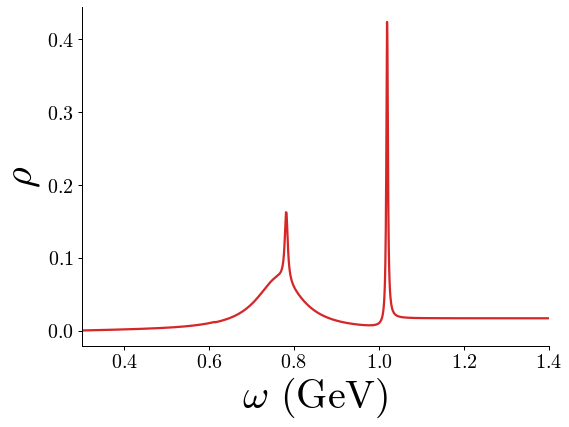

In [6]:
s_rg = np.linspace(0.0, 2.0, 1000)
# fig, ax = pt.plot_1d_func(R,x_bounds=[0.0,2.0],nx=2000,ax_label=[r'$s$ ($\mathrm{GeV}^2$)', r'$R$'],col=pt.pal[3])
fig, ax = pt.plot_1d_data(np.sqrt(s_rg), rho(s_rg), xlims=(0.3, 1.4), ax_label=[r'$\omega$ ($\mathrm{GeV}$)', \
                          r'$\rho$'], col = pt.pal[3], fig_size = (8, 6))
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel(r'$\omega$ ($\mathrm{GeV}$)', fontsize = 40)
ax.set_ylabel(r'$\rho$', fontsize = 40)
fig.savefig('/Users/theoares/Dropbox (MIT)/research/spectral/figures/talks/r_ratio_rho.pdf', bbox_inches = 'tight')

/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/1288282315.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/1288282315.py:3: RuntimeWarning: invalid value encountered in power
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/1288282315.py:3: RuntimeWarning: invalid value encountered in multiply
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \


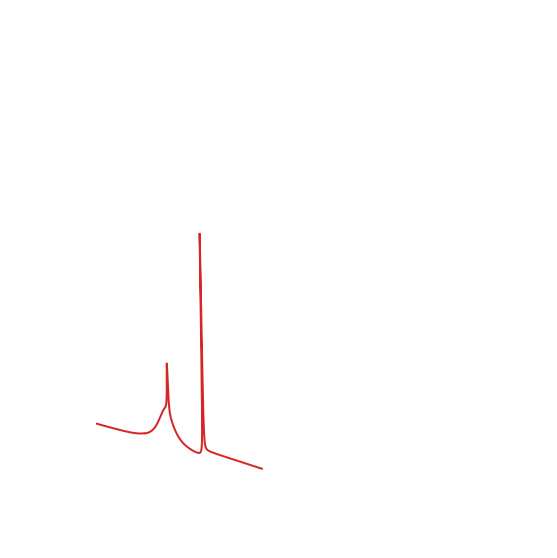

In [7]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')
s_rg = np.linspace(0.0, 2.0, num=1000)
x_axis = np.linspace(-2.0, 2.0, num=2000)
# ax.plot(sqrts_rg, np.zeros(sqrts_rg.shape), zdir = 'x', c = 'k')
# ax.plot(x_axis, np.zeros(x_axis.shape), zdir = 'y', c = 'k')
ax.plot(np.sqrt(s_rg), rho(s_rg), zdir = 'y', c = pt.pal[3], linewidth = 2)

# ax._axis3don = False
ax.set_axis_off()

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.w_zaxis.line.set_lw(0.)
ax.set_zticks([])

ax.w_yaxis.line.set_lw(0.)
ax.set_yticks([])

# x, y, z = np.array([[-1,0,0],[0,0,0],[0,0,0]])
# u, v, w = np.array([[3,0,0],[0,1,0],[0,0,0]])
# ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.1, color="black")
# ax.set_axis_off()

# ax.set_xlim((-2.0, 2.0))
# ax.set_ylim((-0.1, 2.0))
ax.set_xlim((0.0, 2.0))
ax.set_ylim((0.0, 2.0))
ax.set_xlabel(r'$\mathrm{Re}[z]$')

fig.savefig('/Users/theoares/Dropbox (MIT)/research/spectral/figures/talks/r_ratio_3d.pdf', transparent=True, bbox_inches = 'tight')

## Finite volume spectral functions

/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/622407378.py:3: RuntimeWarning: invalid value encountered in sqrt
  rho_inf = np.real(np.sqrt(1 - 2 / (omega**2)))


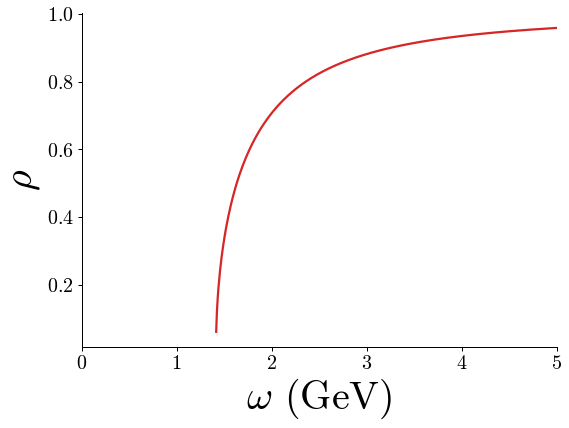

In [8]:
num = 500
omega = np.linspace(1.0, 5.0, num)
rho_inf = np.real(np.sqrt(1 - 2 / (omega**2)))
fig, ax = pt.plot_1d_data(omega, rho_inf, xlims = (0, 5), ax_label=[r'$\omega$ ($\mathrm{GeV}$)', \
                          r'$\rho$'], col = pt.pal[3], fig_size = (8, 6))
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel(r'$\omega$ ($\mathrm{GeV}$)', fontsize = 40)
ax.set_ylabel(r'$\rho$', fontsize = 40)
fig.savefig('/Users/theoares/Dropbox (MIT)/research/spectral/figures/talks/sqrt_branch_cut/inf.pdf', bbox_inches = 'tight')

/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/2905221000.py:11: RuntimeWarning: invalid value encountered in sqrt
  rho_finite[ii] = np.real(np.sqrt(1 - 2 / (omega[ii]**2)))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/theoares/lqcd/utilities/plottools.py:506: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


[1.         1.16032064 1.32064128 1.48096192 1.64128257 1.80160321
 1.96192385 2.12224449 2.28256513 2.44288577 2.60320641 2.76352705
 2.9238477  3.08416834 3.24448898 3.40480962 3.56513026 3.7254509
 3.88577154 4.04609218 4.20641283 4.36673347 4.52705411 4.68737475
 4.84769539]
[       nan        nan        nan 0.29683415 0.50750046 0.61952738
 0.69311191 0.74561555 0.78493979 0.8153907  0.8395656  0.85913903
 0.87524361 0.88867393 0.90000394 0.90965821 0.91795724 0.92514714
 0.93141979 0.93692674 0.94178912 0.94610476 0.94995342 0.95340071
 0.956501  ]
nan
nan
nan
0.2968341461290382
0.5075004585536581
0.6195273802982035
0.6931119062594462
0.7456155469359959
0.784939788741469
0.815390702913025
0.8395655956702949
0.8591390259715584
0.875243607070614
0.8886739344683295
0.9000039401452907
0.9096582114002563
0.9179572383892748
0.9251471435411356
0.9314197930958427
0.9369267436416445
0.9417891225403603
0.9461047598331835
0.9499534219908996
0.9534007097416062
0.9565009997012435
Done
[1.    

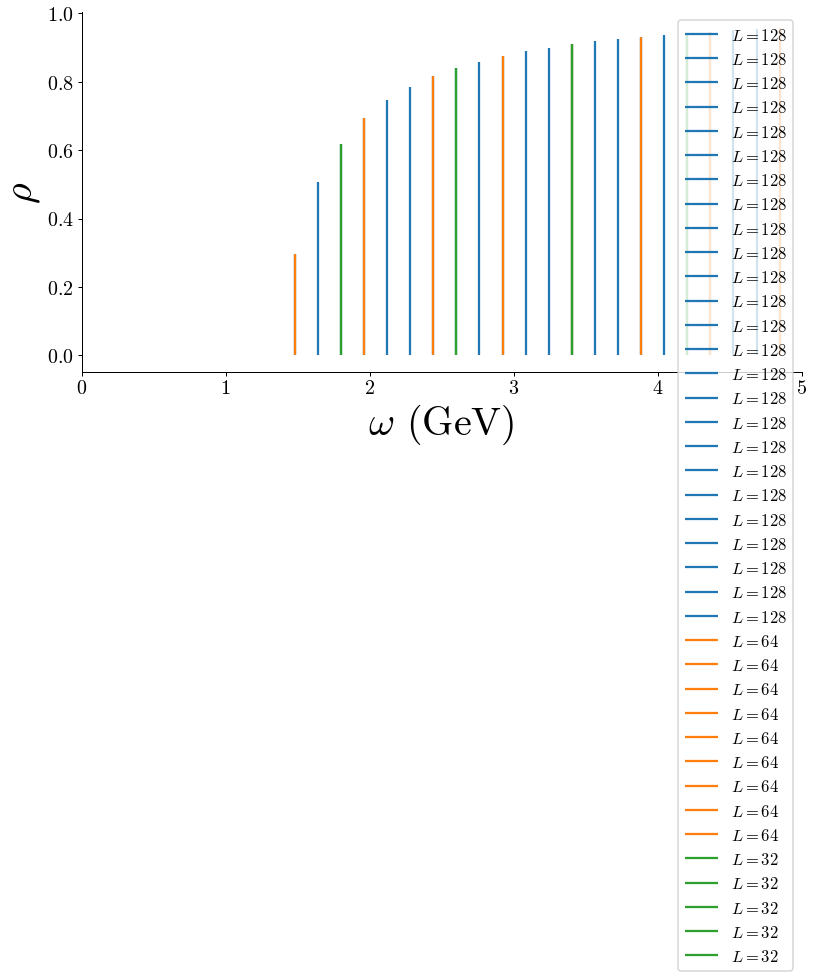

In [9]:
# divs = [20, 40, 60, 80, 100]
divs = [20, 60, 100]
labels = [r'128', r'64', r'32']
fig, axes = pt.add_subplots()
ax = axes[0]
for j, div in enumerate(divs):
    rho_finite = np.zeros((num), dtype = np.float64)
    idxs = []
    for ii in range(num):
        if ii % div == 0:
            rho_finite[ii] = np.real(np.sqrt(1 - 2 / (omega[ii]**2)))
            idxs.append(ii)
    idxs = np.array(idxs)
    omega_sub = omega[idxs]
    rho_finite = rho_inf[idxs]
    pt.plot_fv_spf(omega_sub, rho_finite, ax = ax, col = pt.pal[j], fn_label = r'$L=' + str(labels[j]) + r'$', legend = True)
    #for ii in range(len(idxs)):
    #    ax.axvline(omega_sub[ii], ymax = rho_finite[ii], c = pt.pal[3], label = r'$L=' + str(labels[ii]) + r'$', \
    #              color = pt.pal[ii], legend = True)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel(r'$\omega$ ($\mathrm{GeV}$)', fontsize = 40)
ax.set_ylabel(r'$\rho$', fontsize = 40)
ax.set_xlim((0, 5))
fig.savefig('/Users/theoares/Dropbox (MIT)/research/spectral/figures/talks/sqrt_branch_cut/fv_all.pdf', bbox_inches = 'tight')

/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/2833111279.py:9: RuntimeWarning: invalid value encountered in sqrt
  rho_finite[ii] = np.real(np.sqrt(1 - 2 / (omega[ii]**2)))
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/2833111279.py:9: RuntimeWarning: invalid value encountered in sqrt
  rho_finite[ii] = np.real(np.sqrt(1 - 2 / (omega[ii]**2)))
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/2833111279.py:9: RuntimeWarning: invalid value encountered in sqrt
  rho_finite[ii] = np.real(np.sqrt(1 - 2 / (omega[ii]**2)))
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/2833111279.py:9: RuntimeWarning: invalid value encountered in sqrt
  rho_finite[ii] = np.real(np.sqrt(1 - 2 / (omega[ii]**2)))
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/2833111279.py:9: RuntimeWarning: invalid value encountered in sqrt
  rho_finite[ii] = np.real(np.sqrt(1 - 2 / (omega[ii]**2)))


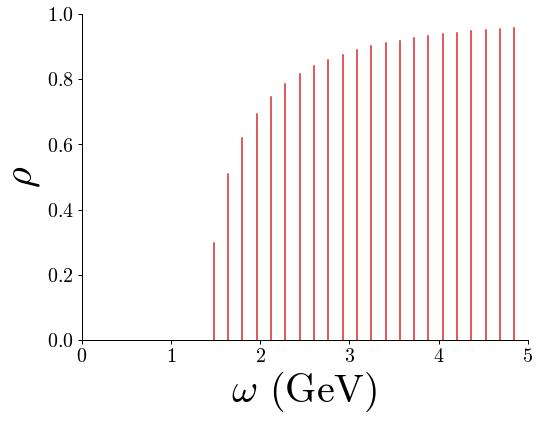

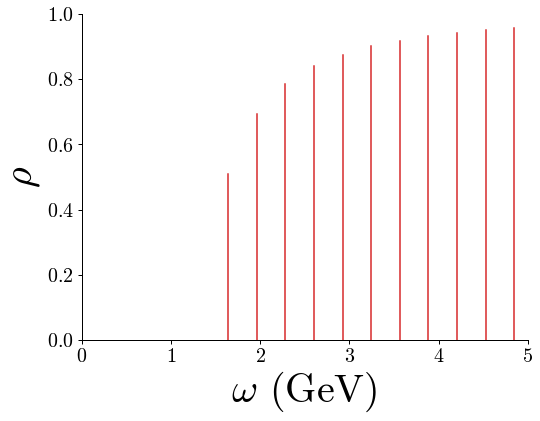

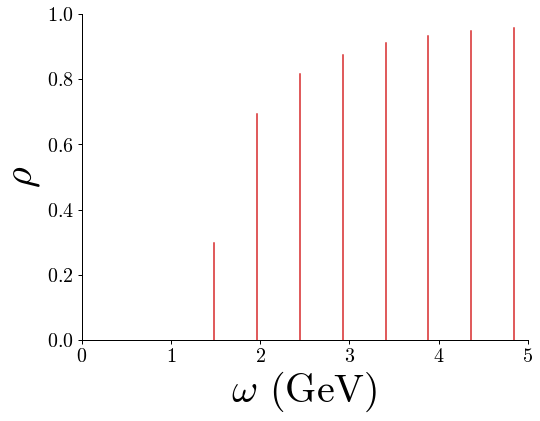

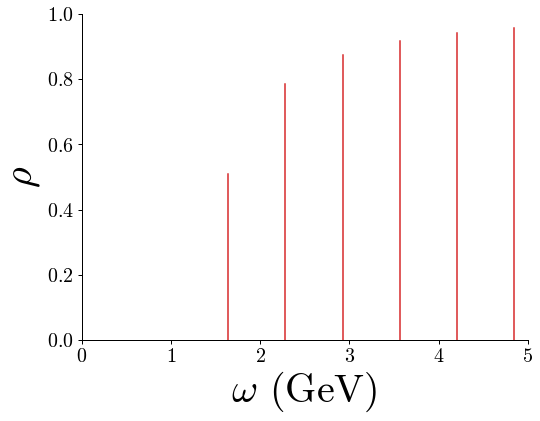

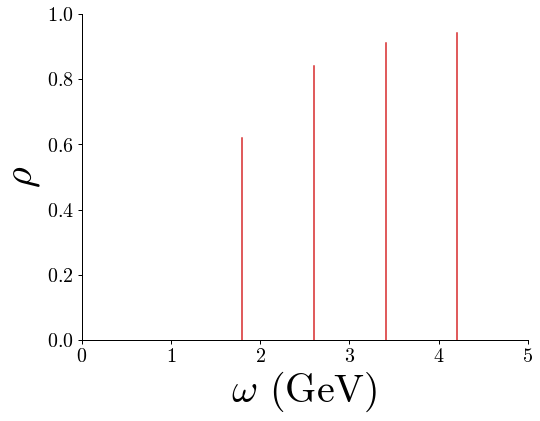

In [10]:
divs = [20, 40, 60, 80, 100]
for div in divs:
    fig, axes = pt.add_subplots(fig_size = (8, 6))
    ax = axes[0]
    rho_finite = np.zeros((num), dtype = np.float64)
    idxs = []
    for ii in range(num):
        if ii % div == 0:
            rho_finite[ii] = np.real(np.sqrt(1 - 2 / (omega[ii]**2)))
            idxs.append(ii)
    idxs = np.array(idxs)
    omega_sub = omega[idxs]
    rho_finite = rho_inf[idxs]
    for ii in range(len(idxs)):
        ax.axvline(omega_sub[ii], ymax = rho_finite[ii], c = pt.pal[3])
#     fig, ax = pt.plot_1d_data(omega_sub, rho_finite, xlims = (0, 5), ax_label=[r'$\omega$ ($\mathrm{GeV}$)', \
#                               r'$\rho$'], col = pt.pal[3], fig_size = (8, 6))
    #fig, ax = pt.plot_1d_data(omega, rho_finite, xlims = (0, 5), ax_label=[r'$\omega$ ($\mathrm{GeV}$)', \
    #                          r'$\rho$'], col = pt.pal[3], fig_size = (8, 6))
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.set_xlabel(r'$\omega$ ($\mathrm{GeV}$)', fontsize = 40)
    ax.set_ylabel(r'$\rho$', fontsize = 40)
    ax.set_xlim((0, 5))
    fig.savefig('/Users/theoares/Dropbox (MIT)/research/spectral/figures/talks/sqrt_branch_cut/fv' + str(div) + '.pdf', bbox_inches = 'tight')

## Multiple spectral functions with same Green's function

In [11]:
reload(pt)

<module 'plottools' from '/Users/theoares/lqcd/utilities/plottools.py'>

/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/1288282315.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/1288282315.py:3: RuntimeWarning: invalid value encountered in power
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_92973/1288282315.py:3: RuntimeWarning: invalid value encountered in multiply
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \


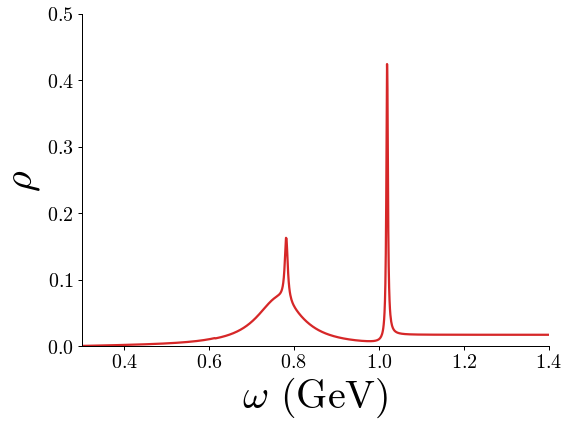

In [12]:
s_rg = np.linspace(0.0, 2.0, 1000)
# fig, ax = pt.plot_1d_func(R,x_bounds=[0.0,2.0],nx=2000,ax_label=[r'$s$ ($\mathrm{GeV}^2$)', r'$R$'],col=pt.pal[3])
fig, ax = pt.plot_1d_data(np.sqrt(s_rg), rho(s_rg), xlims=(0.3, 1.4), ax_label=[r'$\omega$ ($\mathrm{GeV}$)', \
                          r'$\rho$'], col = pt.pal[3], fig_size = (8, 6), ylims = (0.0, 0.5))
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel(r'$\omega$ ($\mathrm{GeV}$)', fontsize = 40)
ax.set_ylabel(r'$\rho$', fontsize = 40)
fig.savefig('/Users/theoares/Dropbox (MIT)/research/spectral/figures/talks/inv_problem/rho_gt.pdf', bbox_inches = 'tight')

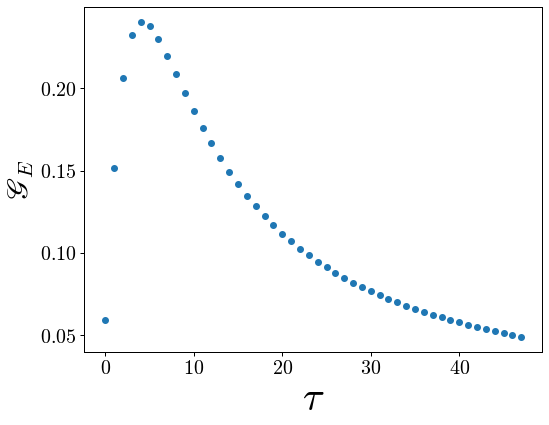

In [15]:
import scipy.interpolate as interpolate
def kernel(omega, beta, tau):
    return (np.exp(-omega*tau) + np.exp(-omega*(beta-tau)))/(1 + np.exp(-beta*tau))
def build_bspline(x, y):
    t, c, k = interpolate.splrep(x, y, s=0, k=4)
    bspline = interpolate.BSpline(t, c, k, extrapolate=True)
    return bspline

beta = 48
tau = np.arange(beta)  # Evaluate on the lattice grid [0, ..., beta-1]
x = np.linspace(0.1, 1.2, num = 10000)
rho_disc = np.array([rho(xx) for xx in x])

corr = np.array([np.trapz(x=x, y=rho_disc*kernel(x, beta, tau_i)) for tau_i in tau])

factor = 10
corr_spline = build_bspline(np.arange(1, beta), corr[1:])
tau_fine = np.linspace(0, beta, num=factor*beta)
corr_fine = corr_spline(tau_fine) / corr_spline(0)

# Compute the Fourier coefficients
corr_ft = np.zeros(beta, dtype=complex)
omega = (2*np.arange(beta) + 1) * np.pi/beta
for l, omega_l in enumerate(omega):
    phase = np.exp(1j*omega_l*tau_fine)
    re = np.trapz(x=tau_fine, y=(corr_fine*phase).real)
    re = 0
    im = np.trapz(x=tau_fine, y=(corr_fine*phase).imag)
    corr_ft[l] = re + 1j*im
corr_ft = corr_ft / (2*np.pi)

fig, ax = pt.scatter_1d(range(beta), corr_ft.imag, ax_label = [r'$\tau$', r'$\mathscr{G}_E$'], fig_size = (8, 6), mkr = 'o')
ax.set_xlabel(r'$\tau$', fontsize = 40)
ax.set_ylabel(r'$\mathscr{G}_E$', fontsize = 30)
fig.savefig('/Users/theoares/Dropbox (MIT)/research/spectral/figures/talks/inv_problem/corr.pdf',bbox_inches='tight')

In [29]:
def R_moved(s):
    sqrts = np.sqrt(s)
    return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
            + theta(sqrts - 4.4*mpi)*theta(M[3] - sqrts)*(f1(sqrts) + f2(sqrts)) \
            + f3(sqrts) #+ 3*Q_sq*theta(sqrts - M[3])
def rho_moved(s):
    return R_moved(s) / (12*np.pi**2)

/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_85989/686227418.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_85989/686227418.py:3: RuntimeWarning: invalid value encountered in power
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_85989/686227418.py:3: RuntimeWarning: invalid value encountered in multiply
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \


[1.22 1.29]
[0.2  0.05]
0.2
0.05
Done


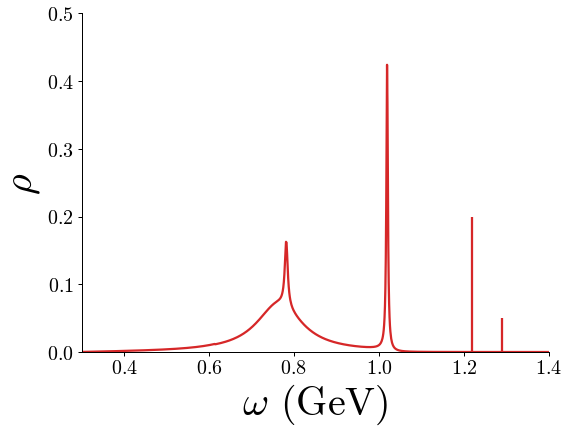

In [42]:
s_rg = np.linspace(0.0, 2.0, 1000)
omega = np.array([1.22, 1.29])
rho_peaks = np.array([0.2, 0.05])
# fig, ax = pt.plot_1d_func(R,x_bounds=[0.0,2.0],nx=2000,ax_label=[r'$s$ ($\mathrm{GeV}^2$)', r'$R$'],col=pt.pal[3])
fig, ax = pt.plot_1d_data(np.sqrt(s_rg), rho_moved(s_rg), xlims=(0.3, 1.4), ax_label=[r'$\omega$ ($\mathrm{GeV}$)', \
                          r'$\rho$'], col = pt.pal[3], fig_size = (8, 6), ylims = (0.0, 0.5))
pt.plot_fv_spf(omega, rho_peaks, ax = ax, col = pt.pal[3], fig_size = (8, 6))
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel(r'$\omega$ ($\mathrm{GeV}$)', fontsize = 40)
ax.set_ylabel(r'$\rho$', fontsize = 40)
fig.savefig('/Users/theoares/Dropbox (MIT)/research/spectral/figures/talks/inv_problem/rho1.pdf', bbox_inches = 'tight')

/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_85989/686227418.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_85989/686227418.py:3: RuntimeWarning: invalid value encountered in power
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_85989/686227418.py:3: RuntimeWarning: invalid value encountered in multiply
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \


[1.09 1.15 1.18]
[0.5  0.24 0.22]
0.5
0.24
0.22
Done


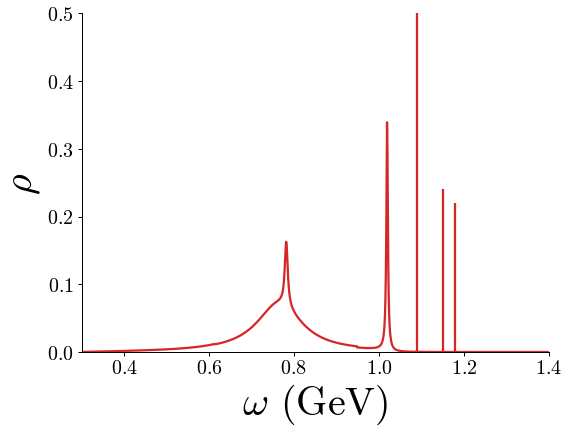

In [45]:
s_rg = np.linspace(0.0, 2.0, 1000)
omega = np.array([1.09, 1.15, 1.18])
rho_peaks = np.array([0.5, 0.24, 0.22])
# fig, ax = pt.plot_1d_func(R,x_bounds=[0.0,2.0],nx=2000,ax_label=[r'$s$ ($\mathrm{GeV}^2$)', r'$R$'],col=pt.pal[3])
fig, ax = pt.plot_1d_data(np.sqrt(s_rg), rho_moved(s_rg) * (1 - 0.2*theta(s_rg - 0.9)), xlims=(0.3, 1.4), ax_label=[r'$\omega$ ($\mathrm{GeV}$)', \
                          r'$\rho$'], col = pt.pal[3], fig_size = (8, 6), ylims = (0.0, 0.5))
pt.plot_fv_spf(omega, rho_peaks, ax = ax, col = pt.pal[3], fig_size = (8, 6))
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel(r'$\omega$ ($\mathrm{GeV}$)', fontsize = 40)
ax.set_ylabel(r'$\rho$', fontsize = 40)
fig.savefig('/Users/theoares/Dropbox (MIT)/research/spectral/figures/talks/inv_problem/rho2.pdf', bbox_inches = 'tight')

/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_85989/686227418.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_85989/686227418.py:3: RuntimeWarning: invalid value encountered in power
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \
/var/folders/q2/tk_jvj_106gddw96ph0kg7r40000gn/T/ipykernel_85989/686227418.py:3: RuntimeWarning: invalid value encountered in multiply
  return theta(sqrts - 2*mpi)*theta(4.4*mpi - sqrts)*(1 - 4*mpi**2/s)**(3/2)*(0.6473 + f0(sqrts))/4 \


[1.09 1.11 1.12 1.15 1.18]
[0.3  0.25 0.23 0.15 0.12]
0.3
0.25
0.23
0.15
0.12
Done


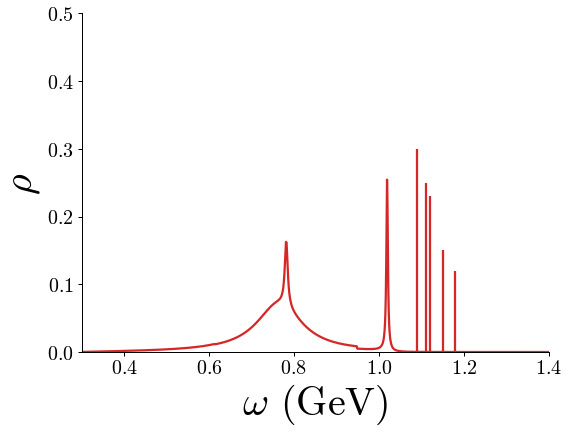

In [47]:
s_rg = np.linspace(0.0, 2.0, 1000)
omega = np.array([1.09, 1.11, 1.12, 1.15, 1.18])
rho_peaks = np.array([0.3, 0.25, 0.23, 0.15, 0.12])
# fig, ax = pt.plot_1d_func(R,x_bounds=[0.0,2.0],nx=2000,ax_label=[r'$s$ ($\mathrm{GeV}^2$)', r'$R$'],col=pt.pal[3])
fig, ax = pt.plot_1d_data(np.sqrt(s_rg), rho_moved(s_rg) * (1 - 0.4*theta(s_rg - 0.9)), xlims=(0.3, 1.4), ax_label=[r'$\omega$ ($\mathrm{GeV}$)', \
                          r'$\rho$'], col = pt.pal[3], fig_size = (8, 6), ylims = (0.0, 0.5))
pt.plot_fv_spf(omega, rho_peaks, ax = ax, col = pt.pal[3], fig_size = (8, 6))
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel(r'$\omega$ ($\mathrm{GeV}$)', fontsize = 40)
ax.set_ylabel(r'$\rho$', fontsize = 40)
fig.savefig('/Users/theoares/Dropbox (MIT)/research/spectral/figures/talks/inv_problem/rho3.pdf', bbox_inches = 'tight')

## Smeared spectral functions

In [43]:
sigma = 0.05
poles = [0.6, 0.8]

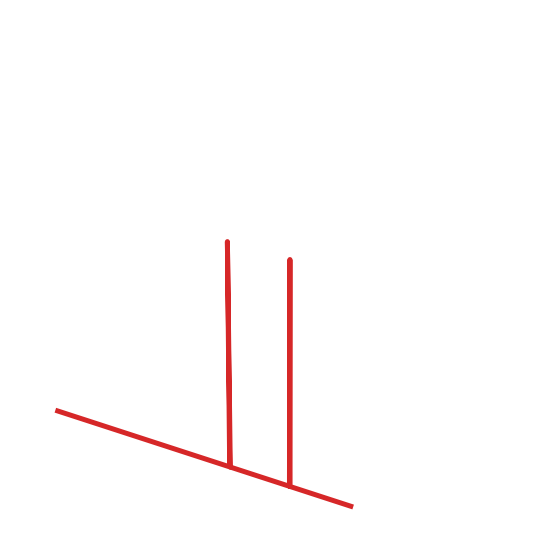

In [50]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')
omegas = np.linspace(0.0, 1.0, num=1001)
x_axis = np.linspace(-1.0, 1.0, num=2000)
def equals(x, y, eps = 1e-5):
    return np.abs(x - y) <= eps
def rho(s):
    for m in poles:
        if equals(s, m):
            return 10.0
    return 0.0
rho_disc = np.array([rho(x) for x in omegas])
ax.plot(omegas, rho_disc, zdir = 'y', c = pt.pal[3], linewidth = 5)

# ax._axis3don = False
ax.set_axis_off()

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.w_zaxis.line.set_lw(0.)
ax.set_zticks([])

ax.w_yaxis.line.set_lw(0.)
ax.set_yticks([])

ax.set_xlim((0.0, 1.0))
ax.set_ylim((0.0, 1.0))

fig.savefig('/Users/theoares/Dropbox (MIT)/research/spectral/figures/talks/smeared/rho_gt.pdf', transparent=True, bbox_inches = 'tight')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


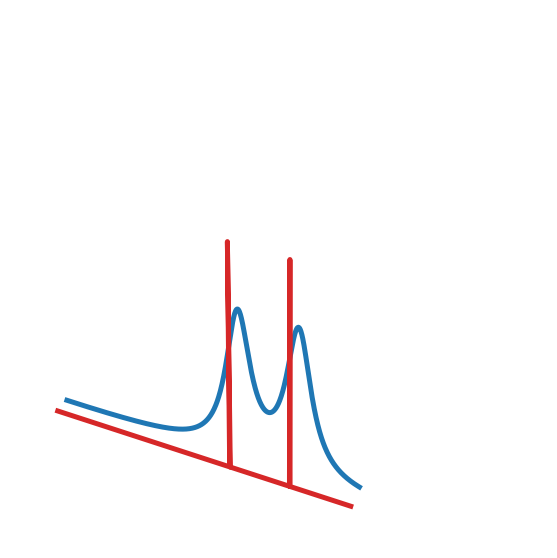

In [49]:
omegas = np.linspace(0.0, 1.0, num=1001)
x_axis = np.linspace(-1.0, 1.0, num=2000)
def delta_eps(z, epsilon = sigma):
    return (epsilon / np.pi) / (z**2 + epsilon**2)
def rho_smear(z):
    r = 0.0 + 0.0j
    for pole in poles:
        r += delta_eps(z.real - pole, epsilon = z.imag)
        r += delta_eps(z.real + pole, epsilon = z.imag)
    return r
rho_smeared_disc = np.array([rho_smear(w + 1j*sigma) for w in omegas])

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')
# ax.plot(omegas, rho_smeared, zdir = 'y', zs = sigma, c = pt.pal[0], linewidth = 2)
ax.plot(omegas, rho_smeared_disc, zdir = 'y', zs = sigma, c = pt.pal[0], linewidth = 5)
ax.plot(omegas, rho_disc, zdir = 'y', c = pt.pal[3], linewidth = 5)

# ax._axis3don = False
ax.set_axis_off()

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# ax.yaxis._axinfo['juggled'] = (1,1,1)

# ax.w_zaxis.line.set_lw(0.)
# ax.set_zticks([])

# ax.w_yaxis.line.set_lw(0.)
# ax.set_yticks([])

ax.set_xlim((0.0, 1.0))
ax.set_ylim((0.0, 1.0))

fig.savefig('/Users/theoares/Dropbox (MIT)/research/spectral/figures/talks/smeared/rho_gt_smeared.pdf', transparent=True, bbox_inches = 'tight')

In [56]:
for x in sns.color_palette():
    print(np.array(x)*256)


[ 31.12156863 119.46666667 180.70588235]
[256.         127.49803922  14.05490196]
[ 44.17254902 160.62745098  44.17254902]
[214.83921569  39.15294118  40.15686275]
[148.58039216 103.40392157 189.74117647]
[140.54901961  86.3372549   75.29411765]
[227.89019608 119.46666667 194.76078431]
[127.49803922 127.49803922 127.49803922]
[188.7372549  189.74117647  34.13333333]
[ 23.09019608 190.74509804 207.81176471]
